In [1]:
import pandas as pd

def process_WB_data(filename):
    
    data = pd.read_csv(filename)

    # Transpose the dataframe to have years as columns and countries as rows
    transposed_data = data.melt(id_vars=['Country Name', 'Country Code', 'Series Code'],
                                value_vars=data.columns[3:],
                                var_name='Year',
                                value_name='Value')

    # Pivot the transposed dataframe to have years as columns
    years_data = transposed_data.pivot_table(index=['Country Name', 'Country Code', 'Series Code'],
                                             columns='Year',
                                             values='Value',
                                             aggfunc='first').reset_index()

    # Pivot the transposed dataframe to have countries as columns
    country_data = transposed_data.pivot_table(index=['Year', 'Series Code'],
                                               columns=['Country Name', 'Country Code'],
                                               values='Value',
                                               aggfunc='first').reset_index()

    # Drop unnecessary columns and reset the index
    years_data.reset_index(drop=True, inplace=True)
    country_data.reset_index(drop=True, inplace=True)
    
    # Clean the transposed dataframe
    transposed_data.columns.name = None  
    transposed_data = transposed_data.rename_axis(None, axis=1)  

    return years_data, country_data, transposed_data

def main():
   
    filename = "climate_change_data.csv"
    years_data, country_data, transposed_data = process_WB_data(filename)
    
    # Print the dataframe with years as columns
    print("\nDataframe with Years as Columns:")
    print(years_data.head())

    # Print the dataframe with countries as columns
    print("\nDataframe with Countries as Columns:")
    print(country_data.head())

    # Print the transposed and cleaned dataframe
    print("\nTransposed and Cleaned DataFrame:")
    print(transposed_data.head())
    
    # Perform statistical analysis on transposed_data
    print("\nSummary Statistics:")
    summary_stats = transposed_data.describe()
    print(summary_stats)

if __name__ == "__main__":
    main()




Dataframe with Years as Columns:
Year Country Name Country Code        Series Code         2008         2009  \
0       Australia          AUS     AG.LND.AGRI.ZS  50.67336605  50.01848405   
1       Australia          AUS     AG.LND.ARBL.ZS  3.123296409  3.533004439   
2       Australia          AUS     AG.LND.CREL.HA     20159099     20674118   
3       Australia          AUS     AG.LND.FRST.ZS  16.92197649  16.89245408   
4       Australia          AUS  AG.LND.IRIG.AG.ZS  0.475483447  0.458287032   

Year         2010         2011         2012         2013         2014  \
0     48.99209872  51.56281322  50.38543145  48.39371022  48.73839866   
1     3.331261471  4.125704542  4.118219804  4.063991253  4.160251487   
2        20141256     19057341     19431383     18381762     17971289   
3     16.86293167  16.95531026  17.04768884  17.14006743  17.23244601   
4      0.48914372  0.495555651  0.553121351  0.639634187  0.630650361   

Year         2015         2016         2017         

In [2]:
import pandas as pd

def process_WB_data(filename):
    data = pd.read_csv(filename)

    # Transpose the dataframe to have years as columns and countries as rows
    transposed_data = data.melt(id_vars=['Country Name', 'Country Code', 'Series Code','Series Name'],
                                value_vars=data.columns[3:],
                                var_name='Year',
                                value_name='Value')

    # Pivot the transposed dataframe to have years as columns
    years_data = transposed_data.pivot_table(index=['Country Name', 'Country Code', 'Series Code','Series Name'],
                                             columns='Year',
                                             values='Value',
                                             aggfunc='first').reset_index()

    # Pivot the transposed dataframe to have countries as columns
    country_data = transposed_data.pivot_table(index=['Year', 'Series Code'],
                                               columns=['Country Name', 'Country Code'],
                                               values='Value',
                                               aggfunc='first').reset_index()

    # Drop unnecessary columns and reset the index
    years_data.reset_index(drop=True, inplace=True)
    country_data.reset_index(drop=True, inplace=True)

    # Clean the transposed dataframe
    transposed_data.columns.name = None
    transposed_data = transposed_data.rename_axis(None, axis=1)

    return years_data, country_data, transposed_data

def save_and_read_transposed_data():
    filename = "climate_change_data.csv"
    _, _, transposed_data = process_WB_data(filename)

    # Save transposed_data to a CSV file
    transposed_data.to_csv("transposed_data.csv", index=False)
    print("Transposed data saved to 'transposed_data.csv'.")

    # Read the saved CSV file back to a dataframe
    reloaded_data = pd.read_csv("transposed_data.csv")
    print("Transposed data reloaded:")
    print(reloaded_data.head())

if __name__ == "__main__":
    save_and_read_transposed_data()


Transposed data saved to 'transposed_data.csv'.
Transposed data reloaded:
  Country Name Country Code           Series Code  \
0     Malaysia          MYS     EG.USE.ELEC.KH.PC   
1     Malaysia          MYS        AG.LND.AGRI.ZS   
2     Malaysia          MYS     AG.LND.IRIG.AG.ZS   
3     Malaysia          MYS     EN.ATM.METH.AG.ZS   
4     Malaysia          MYS  EN.ATM.METH.AG.KT.CE   

                                         Series Name  Year        Value  
0        Electric power consumption (kWh per capita)  2008  3235.216974  
1                 Agricultural land (% of land area)  2008  21.76350632  
2  Agricultural irrigated land (% of total agricu...  2008           ..  
3        Agricultural methane emissions (% of total)  2008  11.69956668  
4  Agricultural methane emissions (thousand metri...  2008      4794.91  


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
data=pd.read_csv('transposed_data.csv')
data.head()


,Country Name,Country Code,Series Code,Series Name,Year,Value
0,Malaysia,MYS,EG.USE.ELEC.KH.PC,Electric power consumption (kWh per capita),2008,3235.216974
1,Malaysia,MYS,AG.LND.AGRI.ZS,Agricultural land (% of land area),2008,21.76350632
2,Malaysia,MYS,AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,2008,..
3,Malaysia,MYS,EN.ATM.METH.AG.ZS,Agricultural methane emissions (% of total),2008,11.69956668
4,Malaysia,MYS,EN.ATM.METH.AG.KT.CE,Agricultural methane emissions (thousand metri...,2008,4794.91


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  2520 non-null   object
 1   Country Code  2520 non-null   object
 2   Series Code   2520 non-null   object
 3   Series Name   2520 non-null   object
 4   Year          2520 non-null   int64 
 5   Value         2520 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [5]:
# Remove special characters from the "Value" column and convert it to numeric
data['Value'] = pd.to_numeric(data['Value'].str.replace('[^\d.]', '', regex=True), errors='coerce')


In [6]:
data.head()

,Country Name,Country Code,Series Code,Series Name,Year,Value
0,Malaysia,MYS,EG.USE.ELEC.KH.PC,Electric power consumption (kWh per capita),2008,3235.216974
1,Malaysia,MYS,AG.LND.AGRI.ZS,Agricultural land (% of land area),2008,21.763506
2,Malaysia,MYS,AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,2008,NaN
3,Malaysia,MYS,EN.ATM.METH.AG.ZS,Agricultural methane emissions (% of total),2008,11.699567
4,Malaysia,MYS,EN.ATM.METH.AG.KT.CE,Agricultural methane emissions (thousand metri...,2008,4794.910000


In [7]:
data.isnull().sum()

Country Name      0
Country Code      0
Series Code       0
Series Name       0
Year              0
Value           716
dtype: int64

In [8]:
data = data.dropna(subset=['Value'])


In [9]:
data.describe()

,Year,Value
count,1804.000000,1.804000e+03
mean,2014.430710,1.759554e+06
std,4.119158,1.027016e+07
min,2008.000000,0.000000e+00
25%,2011.000000,1.448206e+01
50%,2014.000000,5.987171e+01
75%,2018.000000,9.385393e+03
max,2022.000000,1.024347e+08


In [10]:
import pandas as pd

column_of_interest = 'Value'

# Convert the 'Value' column to numeric, handling errors by coercing to NaN
data[column_of_interest] = pd.to_numeric(data[column_of_interest], errors='coerce')

# Explore statistical properties using .describe()
description = data[column_of_interest].describe()

# Other statistical methods
median_value = data[column_of_interest].median()
std_deviation = data[column_of_interest].std()

# Print the results
print(f"Summary Statistics for {column_of_interest}:\n{description}")
print(f"Median of {column_of_interest}: {median_value}")
print(f"Standard Deviation of {column_of_interest}: {std_deviation}")


Summary Statistics for Value:
count    1.804000e+03
mean     1.759554e+06
std      1.027016e+07
min      0.000000e+00
25%      1.448206e+01
50%      5.987171e+01
75%      9.385393e+03
max      1.024347e+08
Name: Value, dtype: float64
Median of Value: 59.87170623
Standard Deviation of Value: 10270164.33427157


In [11]:

df_years = data.pivot_table(index=['Country Name', 'Country Code', 'Series Code','Series Name'],
                          columns='Year', values='Value').reset_index()

In [12]:
df_years.head()

Year,Country Name,Country Code,Series Code,Series Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Australia,AUS,AG.LND.AGRI.ZS,Agricultural land (% of land area),5.067337e+01,5.001848e+01,4.899210e+01,5.156281e+01,5.038543e+01,4.839371e+01,4.873840e+01,4.531442e+01,4.453993e+01,4.834062e+01,4.665810e+01,4.712377e+01,4.625248e+01,4.725924e+01,NaN
1,Australia,AUS,AG.LND.ARBL.ZS,Arable land (% of land area),3.123296e+00,3.533004e+00,3.331261e+00,4.125705e+00,4.118220e+00,4.063991e+00,4.160251e+00,4.047056e+00,3.907556e+00,3.997910e+00,4.026771e+00,3.974639e+00,3.983869e+00,4.064602e+00,NaN
2,Australia,AUS,AG.LND.CREL.HA,Land under cereal production (hectares),2.015910e+07,2.067412e+07,2.014126e+07,1.905734e+07,1.943138e+07,1.838176e+07,1.797129e+07,1.834739e+07,1.697671e+07,1.871602e+07,1.663309e+07,1.652644e+07,1.612263e+07,2.004608e+07,NaN
3,Australia,AUS,AG.LND.FRST.ZS,Forest area (% of land area),1.692198e+01,1.689245e+01,1.686293e+01,1.695531e+01,1.704769e+01,1.714007e+01,1.723245e+01,1.732482e+01,1.742549e+01,1.742291e+01,1.742131e+01,1.742131e+01,1.742131e+01,1.742131e+01,NaN
4,Australia,AUS,AG.LND.IRIG.AG.ZS,Agricultural irrigated land (% of total agricu...,4.754834e-01,4.582870e-01,4.891437e-01,4.955557e-01,5.531214e-01,6.396342e-01,6.306504e-01,6.173464e-01,6.266747e-01,6.034902e-01,6.402987e-01,5.393446e-01,4.275174e-01,5.350477e-01,NaN


C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

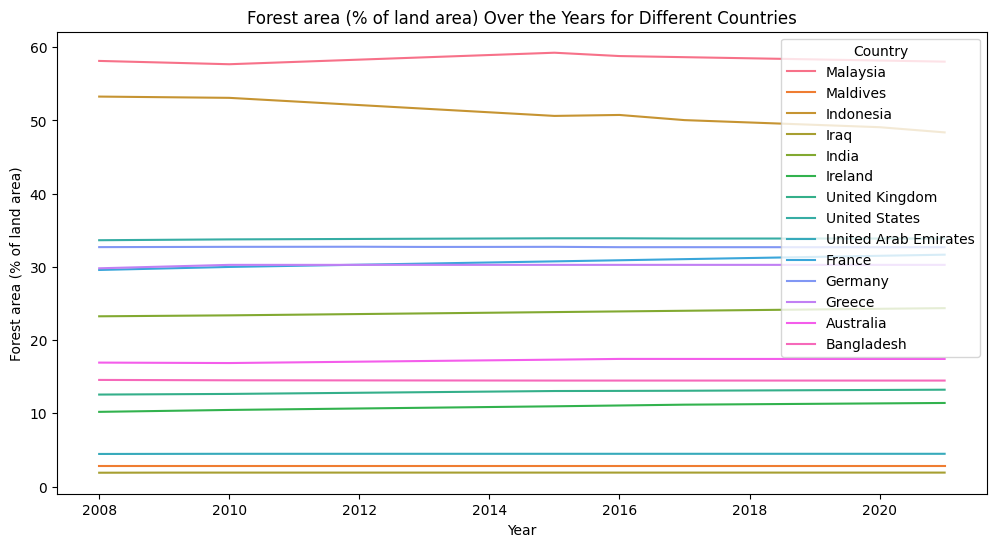

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='Country Name', data=data[data['Series Name'] == 'Forest area (% of land area)'])
plt.title('Forest area (% of land area) Over the Years for Different Countries')
plt.xlabel('Year')
plt.ylabel('Forest area (% of land area)')
plt.legend(title='Country')
plt.show()

C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


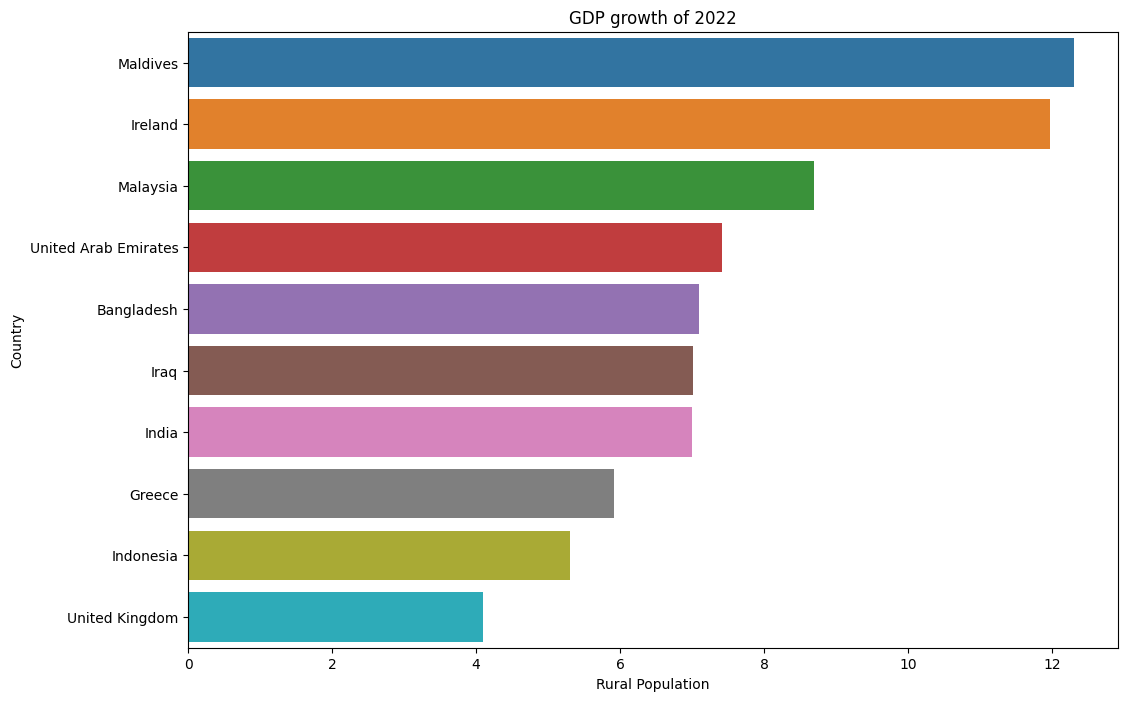

In [14]:

latest_year = df_years.columns[-1]
GDP_growth = df_years[df_years['Series Name'] == 'GDP growth (annual %)']
GDP_growth = GDP_growth[['Country Name', latest_year]]
GDP_growth = GDP_growth.sort_values(by=latest_year, ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=latest_year, y='Country Name', data=GDP_growth.head(10))
plt.title(f'GDP growth of {latest_year}')
plt.xlabel('Rural Population')
plt.ylabel('Country')
plt.show()


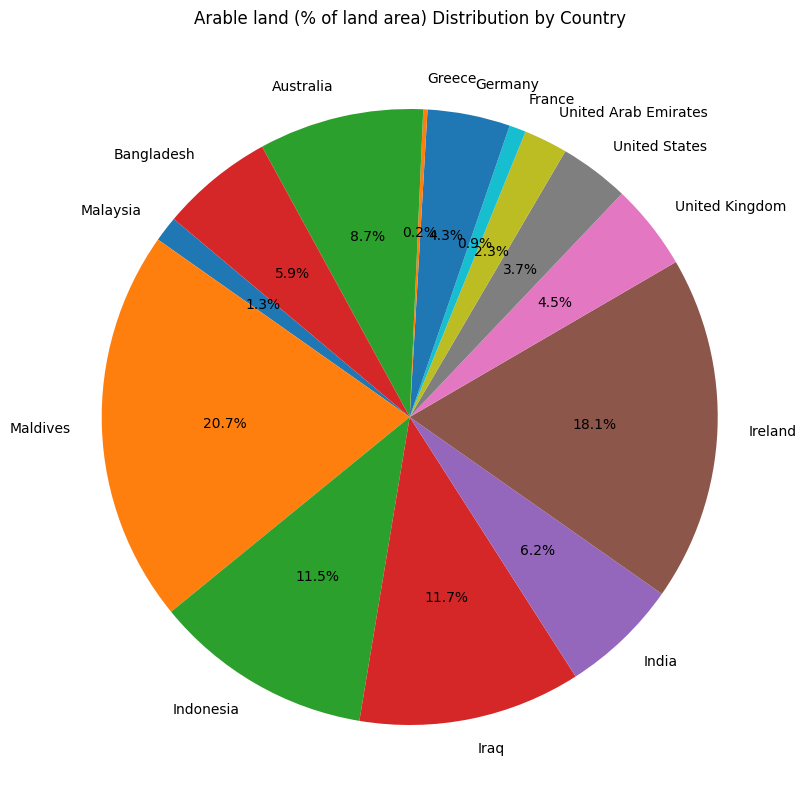

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the specific series
filtered_data = data[data['Series Name'] == 'Arable land (% of land area)']

# Create a pie chart
plt.figure(figsize=(15, 10))
plt.pie(filtered_data.groupby('Country Name')['Value'].sum(), labels=filtered_data['Country Name'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Arable land (% of land area) Distribution by Country')
plt.show()


In [16]:

numeric_columns = df_years.select_dtypes(include=['float64', 'int64']).columns
df_corr = df_years[numeric_columns].corr()
df_corr.head()


Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,,,
2008,1.000000,0.999886,0.999717,0.999521,0.999967,0.999849,0.999589,0.999781,0.999754,0.998553,0.998667,0.998995,0.997928,0.998551,0.957456
2009,0.999886,1.000000,0.999787,0.999501,0.999811,0.999626,0.999391,0.999612,0.999421,0.998753,0.998677,0.998889,0.997766,0.998630,0.955697
2010,0.999717,0.999787,1.000000,0.999916,0.999648,0.999707,0.999774,0.999786,0.999471,0.999402,0.999262,0.999543,0.998870,0.999353,0.955980
2011,0.999521,0.999501,0.999916,1.000000,0.999435,0.999620,0.999839,0.999843,0.999505,0.999640,0.999552,0.999809,0.999363,0.999607,0.955560
2012,0.999967,0.999811,0.999648,0.999435,1.000000,0.999909,0.999617,0.999723,0.999776,0.998361,0.998561,0.998935,0.997859,0.998342,0.954166


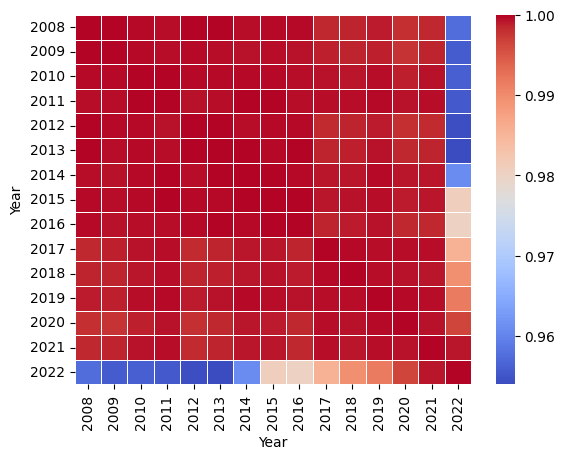

In [17]:

sns.heatmap(df_corr, cmap='coolwarm',linewidths=.5)
plt.show()

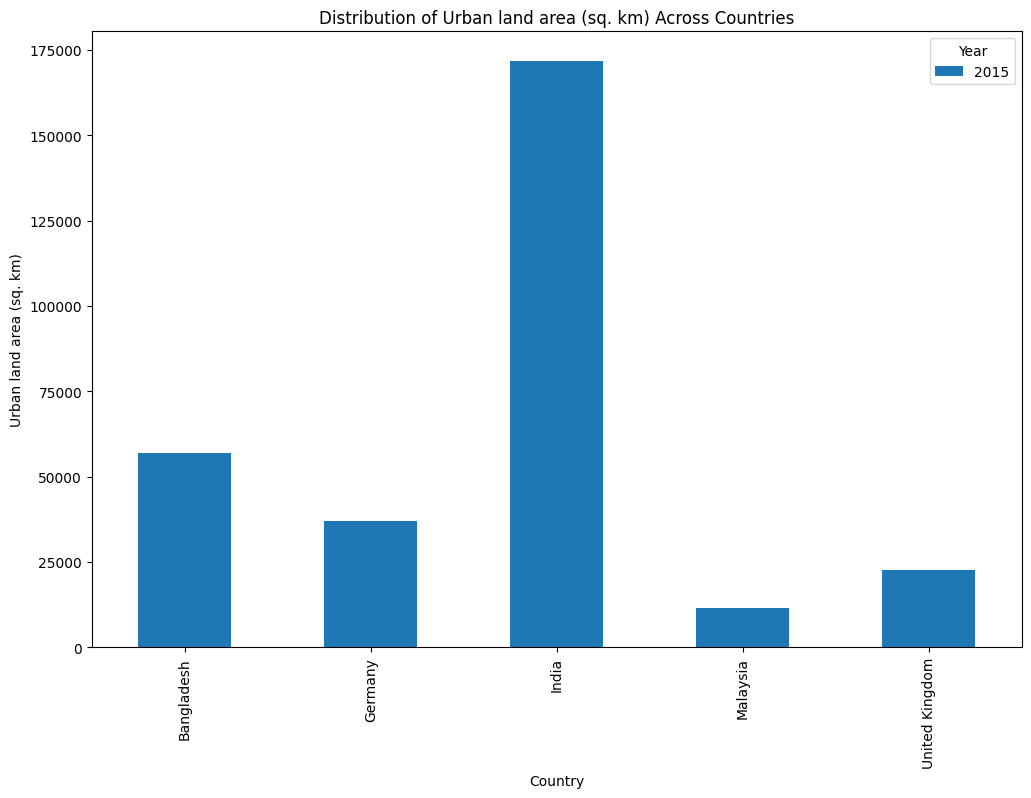

In [18]:


# Select the series name and countries of interest
selected_series_name = 'Urban land area (sq. km)'
selected_countries = ['Malaysia', 'Germany', 'Bangladesh', 'India', 'United Kingdom']

# Filter the DataFrame for the selected series name and countries
selected_data = data[(data['Series Name'] == selected_series_name) & (data['Country Name'].isin(selected_countries))]

# Pivot the data for easy plotting
pivot_data = selected_data.pivot_table(index='Country Name', columns='Year', values='Value', fill_value=0)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title(f'Distribution of {selected_series_name} Across Countries')
plt.xlabel('Country')
plt.ylabel(selected_series_name)
plt.legend(title='Year')
plt.show()


C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

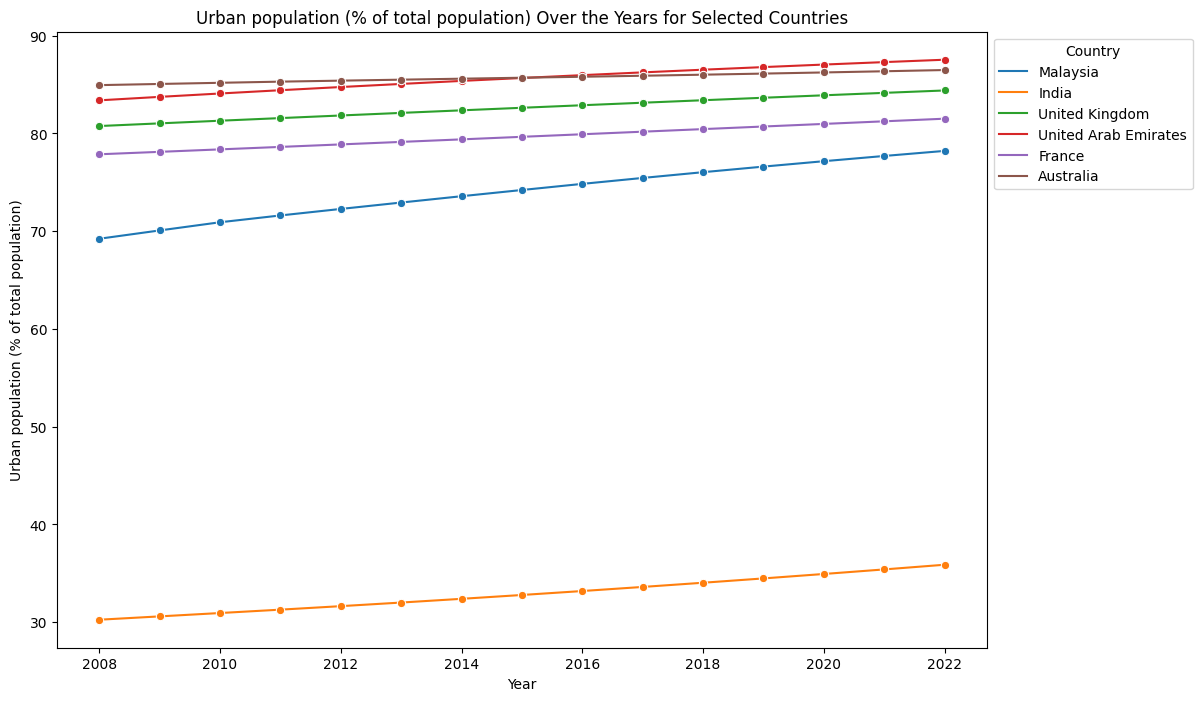

In [19]:


# Select the series and countries of interest
selected_series = 'Urban population (% of total population)'
selected_countries = ['India', 'USA', 'United Kingdom', 'Australia', 'France','Malaysia','United Arab Emirates']

# Filter the DataFrame for the selected series and countries
electric_power_data = data[(data['Series Name'] == selected_series) & (data['Country Name'].isin(selected_countries))]

# Plot the line graph
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Value', hue='Country Name', data=electric_power_data, marker='o')
plt.title(f'{selected_series} Over the Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel(selected_series)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sunit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

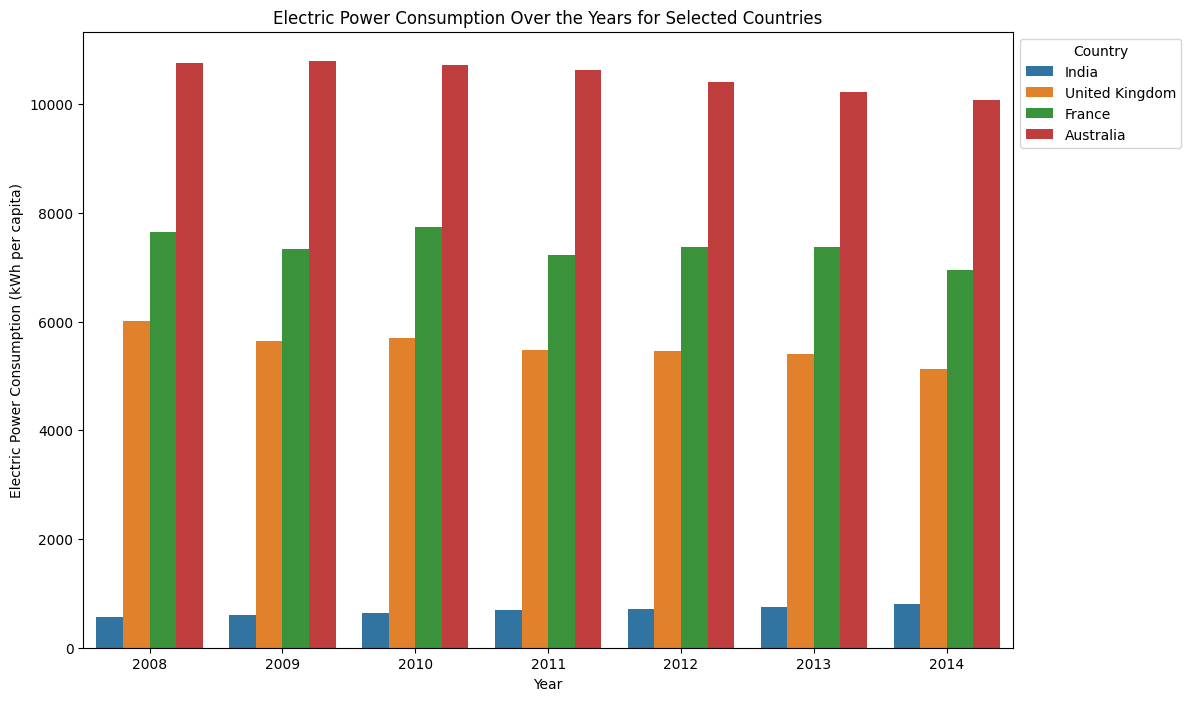

In [20]:


# Select the countries of interest
selected_countries = ['India', 'USA', 'United Kingdom', 'Australia', 'France']

# Filter the DataFrame for the 'Electric power consumption (kWh per capita)' series and selected countries
electric_power_data = data[(data['Series Name'] == 'Electric power consumption (kWh per capita)') & (data['Country Name'].isin(selected_countries))]

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Value', hue='Country Name', data=electric_power_data)
plt.title('Electric Power Consumption Over the Years for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Electric Power Consumption (kWh per capita)')
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
